In [99]:
import re
import numpy as np
from functools import reduce
from collections import defaultdict
from itertools import permutations
from copy import deepcopy
from string import ascii_uppercase, ascii_lowercase

def find_nums(s, neg = False):
    if neg:
        return re.findall(r'-?\d+', s)
    return re.findall(r'\d+', s)

In [100]:
# 1

def count_fuel(weight):
    weight = weight // 3 - 2
    if weight > 0: return weight + count_fuel(weight)
    return 0

def fueling(data):
    weights = [max((int(d) // 3) - 2, 0) for d in data]
    fuels = sum([count_fuel(x) for x in weights])
    print(sum(weights), sum(weights) + fuels)

with open('1') as f:
    fueling(f.read().split('\n'))


3252897 4876469


In [101]:
# 2

def opcodes(d, p1=True):
    for x in range(100):
        for y in range(100):
            data = [*(map(int, d))]
            data[1] = x
            data[2] = y
            i = 0
            while True:
                if i > len(data) - 3:
                    op, f, s, res = data[i:i + 4] + data[:((i + 4) % len(data))]
                else:
                    op, f, s, res = data[i:i+4]
                newpos = int(res) % int(len(data))
                if op == 99:
                    if p1:
                        print(data[0])
                        return
                    else:
                        if data[0] == 19690720:
                            print(x, y)
                            return
                    break
                elif op == 1:
                    data[newpos] = data[f] + data[s]
                elif op == 2:
                    data[newpos] = data[f] * data[s]

                i = (i + 4) % len(data)

with open('2') as f:
    lines = f.read().split(',')
    opcodes(lines)
    opcodes(lines, False)

490699
64 21


In [102]:
# 3

def wire_crossing(lines):
    intersects = set([])
    points = [{},{}]
    dx = {'L': -1, 'R': 1, 'U': 0, 'D': 0}
    dy = {'L': 0, 'R': 0, 'U': 1, 'D': -1}
    for i, line in enumerate(lines):
        x=y=0
        directions = line.split(',')
        curr_dist = 0
        for d in directions:
            length = int(find_nums(d)[0])
            di = d[0]
            for j in range(length):
                x += dx[di]
                y += dy[di]
                curr_dist += 1
                
                if (x, y) not in points[i]:
                    points[i][(x, y)] = curr_dist
                    if i == 1 and (x, y) in points[0]:
                        intersects.add((x, y, points[1][(x, y)] + points[0][(x, y)]))
                        
    print(sorted([abs(p[0]) + abs(p[1]) for p in intersects])[0])
    print(sorted([abs(p[2]) for p in intersects])[0])
                
with open('3') as f:
    lines = f.readlines()
    wire_crossing(lines)
    

1017
11432


In [108]:
# 4
def passswordssses(nums):
    start, end = [int(x) for x in nums]
    valid_password = 0
    for i in range(start, end + 1):
        i = [*str(i)]
        first,second,third,fourth,fifth,sixth = i
        if first <= second <= third <= fourth <= fifth <= sixth:
            counts = defaultdict(int)
            for c in i:
                counts[c] += 1
            valid_password += any([v == 2 for v in counts.values()])

    print(valid_password)
    
with open('4') as f:
    lines = f.read().split('-')
    passswordssses(lines)
    

1148


In [228]:
# 5

with open('5') as f:
    params = [int(c) for c in f.read().split(',')]
    i = 0
    while True:
        op = '0' * (5 - len(str(params[i]))) + str(params[i])
        opcode = op[-2:]
        p_types = [c for c in reversed('0' * (5 - len(op)) + op[:-2])]
        get_param = lambda mode, pos: params[pos] if mode == '1' else params[params[pos]]

        if opcode == '04':
            print('Output:', get_param(p_types[0], i + 1))
            i += 2
        elif opcode == '05':
            p1 = get_param(p_types[0], i + 1)
            if p1:
                i = get_param(p_types[1], i + 2)
            else:
                i += 3
        elif opcode == '06':
            p1 = get_param(p_types[0], i + 1)
            if p1 == 0:
                i = get_param(p_types[1], i + 2)
            else:
                i += 3
        elif opcode == '07':
            p1, p2, p3 = get_param(p_types[0], i + 1), get_param(p_types[1], i + 2), get_param(p_types[2], i + 3)
            params[params[i + 3]] = int(p1 < p2)
            i += 4
        elif opcode == '08':
            p1, p2, p3 = get_param(p_types[0], i + 1), get_param(p_types[1], i + 2), get_param(p_types[2], i + 3)
            params[params[i + 3]] = int(p1 == p2)
            i += 4
        elif opcode == '03':
            param = int(input())
            params[params[i + 1]] = param
            i += 2
        elif opcode == '99':
            print('EXITING', params[0])
            break
        elif opcode == '01':
            params[params[i + 3]] = get_param(p_types[0], i + 1) + get_param(p_types[1], i + 2)
            i += 4
        elif opcode == '02':
            params[params[i + 3]] = get_param(p_types[0], i + 1) * get_param(p_types[1], i + 2)
            i += 4
        else:
            print("ERROR ERROR ERROR ERROR !!!!!!!!!!!!!!!!!!!!!!!!!")

            
        

 5


Output: 15586959
EXITING 314


In [106]:
# 6

class Node:
    def __init__(self, val):
        self.parents = []
        self.children = []
        self.val = val

def recurse_tree(node, depth):
    total = depth
    for n in node.children:
        total += recurse_tree(n, depth + 1)
    return total
        
def finders_keepers(data):
    nodes = {}
    directs = 0
    
    for target, orbiter in [d.split(')') for d in data]:
        if target not in nodes:
            nodes[target] = Node(target)
        if orbiter not in nodes:
            nodes[orbiter] = Node(orbiter)
        nodes[target].children += [nodes[orbiter]]
        nodes[orbiter].parents += [nodes[target]]
        directs += 1
        
    for n in nodes.values():
        if len(n.parents) == 0:
            for node in n.children:
                indirects = recurse_tree(node, 0)
                
    print(directs + indirects)
    
    queue = [(n, 1) for n in nodes['YOU'].children + nodes['YOU'].parents]
    visited = set(queue)
    while len(queue) > 0:
        curr, dist = queue.pop(0)
        if curr.val == 'SAN':
            print(dist - 2)
            break
        for n in curr.children + curr.parents:
            if n not in visited:
                queue += [(n, dist + 1)]
            
        visited.add(curr)
            

with open('6') as f:
    lines = f.read().split('\n')
    finders_keepers(lines)

300598
520


In [233]:
# 7

class Program:
    def __init__(self, ip, state):
        self.ip = ip
        self.state = state
        self.i = 0
        self.inputs = [ip]
        
    def add_input(self, val):
        self.inputs += [val]
        
    def step(self):
        while True:
            op = '0' * (5 - len(str(self.state[self.i]))) + str(self.state[self.i])
            opcode = op[-2:]
            p_types = [c for c in reversed('0' * (5 - len(op)) + op[:-2])]
            get_param = lambda mode, pos: self.state[pos] if mode == '1' else self.state[self.state[pos]]

            if opcode == '04':
                out = get_param(p_types[0], self.i + 1)
                self.i += 2
                return out
            elif opcode == '05':
                p1 = get_param(p_types[0], self.i + 1)
                if p1:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '06':
                p1 = get_param(p_types[0], self.i + 1)
                if p1 == 0:
                    self.i = get_param(p_types[1], self.i + 2)
                else:
                    self.i += 3
            elif opcode == '07':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                self.state[self.state[self.i + 3]] = int(p1 < p2)
                self.i += 4
            elif opcode == '08':
                p1, p2, p3 = get_param(p_types[0], self.i + 1), get_param(p_types[1], self.i + 2), get_param(p_types[2], self.i + 3)
                self.state[self.state[self.i + 3]] = int(p1 == p2)
                self.i += 4
            elif opcode == '03':
                param = self.inputs.pop(0)
                self.state[self.state[self.i + 1]] = param
                self.i += 2
            elif opcode == '99':
                return 'EXIT'
            elif opcode == '01':
                self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) + get_param(p_types[1], self.i + 2)
                self.i += 4
            elif opcode == '02':
                self.state[self.state[self.i + 3]] = get_param(p_types[0], self.i + 1) * get_param(p_types[1], self.i + 2)
                self.i += 4
            else:
                print("ERROR ERROR ERROR ERROR !!!!!!!!!!!!!!!!!!!!!!!!!", len(self.state), self.state)
                return 'ERROR'
            
def solverson(data):
    data = [int(c) for c in data.split(',')]
    
    rec = 0
    for inputs in permutations(range(5, 10), 5):
        val = 0
        state = [Program(inputs[v], deepcopy(data)) for v in range(5)]
        while True:
            for program in state:
                program.add_input(val)
                returned = program.step()
                val = returned
            if returned == 'EXIT':
                break
            rec = max(rec, val)
    print(rec)

with open('7') as f:
    lines = f.read()
    solverson(lines)

61019896


1596


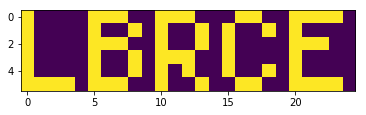

In [361]:
# 8 

import matplotlib.pyplot as plt

def eight(data, l, w):
    arr = np.array([int(c) for c in data]).reshape((l,w,len(data) // (l * w)))
    curr = []
    best_sum= float('inf')
    bs = []
    for ind, i in enumerate((data)):
        curr += [int(i)]
        mod = ind % (w * l)

        if mod == l * w- 1:
            arr[:,:,ind // (l * w)] = np.array(curr).reshape(l,w)
            if sum([c == 0 for c in curr]) < best_sum:
                bs = curr
                best_sum = sum([c == 0 for c in curr])
            curr = []
            
    print(sum([c == 1 for c in bs]) * sum([c == 2 for c in bs]))
    
    img = np.zeros((l, w))
    for y in range(l):
        for x in range(w):
            img[y, x] = 2
            for pix in range(len(data) // (l * w)):
                if arr[y, x, pix] != 2:
                    img[y, x] = arr[y, x, pix]
                    break
    plt.imshow(img)
    plt.show()
    
with open('8') as f:
    lines = f.read()
    eight(lines, 6,25)